# Some prototype plots to address paper revisions

This doesn not yet work with dask trend arrays (needs fix)...
also I have deactivated it for now, because I just want to look quickly at the density structure.

In [1]:
# !mamba install "pandas<1.3.0" -y
# !pip install git+https://github.com/pydata/xarray.git

In [2]:
%matplotlib inline

In [3]:
import cartopy.crs as ccrs
from xarrayutils.plotting import map_util_plot
import matplotlib.pyplot as plt
from cmip6_omz.regridding_tools import regrid_regular

In [4]:
import pandas
pandas.__version__
import numpy as np

In [5]:
from dask.diagnostics import ProgressBar
import pathlib
import xarray as xr
from xarrayutils.utils import linear_trend
from xarrayutils.utils import sign_agreement

In [6]:
def trend_wrapper(da):
    trend = linear_trend(da, 'time')
    return trend.slope * len(da.time)

In [7]:
# # starting from the raw data
# from cmip6_omz.utils import cmip6_collection
# from cmip6_preprocessing.preprocessing import combined_preprocessing
# import intake
# col = intake.open_esm_datastore(cmip6_collection(zarr=True))

In [8]:
# cat = col.search(
#     source_id=['CanESM5'],
#     variable_id=['thetao'],
#     experiment_id=['historical'],
#     member_id=['r14i1p1f1', 'r3i1p1f1'],
#     table_id=['Omon']
# )

# ddict = cat.to_dataset_dict(
#     cdf_kwargs={
#         'use_cftime':True,
#         'decode_times':True,
#         'engine':'h5netcdf',
#         'chunks':{'time':3}
#     },
#     aggregate=False, 
#     preprocess = combined_preprocessing
# )

In [9]:
# # test the detrended stuff
# import xarray as xr
# from cmip6_preprocessing.drift_removal import match_and_remove_trend
# ds_test = xr.open_dataset('/home/jbusecke/projects/cmip6_omz/data/external/cmip6_control_drifts/CMIP.CCCma.CanESM5.historical.r14i1p1f1.Omon.gn.v20190429.thetao.nc')
# trend_dict = {'just_a_test':ds_test}
# # ds_test.thetao.isel(lev=10).plot()

In [10]:
# ddict_detrended = match_and_remove_trend(ddict, trend_dict)

In [11]:
# list(ddict.keys())

In [11]:
# list(ddict_detrended.keys())

In [12]:
# import matplotlib.pyplot as plt

In [13]:
# roi={'x':100, 'y':100, 'lev':10}
# ds_raw = ddict['CMIP.CCCma.CanESM5.historical.r14i1p1f1.Omon.thetao.gn.v20190429./projects/GEOCLIM/LRGROUP/jbusecke/projects/cmip_data_management_princeton/builder/../zarr_conversion/CMIP6/CMIP/CCCma/CanESM5/historical/r14i1p1f1/Omon/thetao/gn/v20190429/CMIP.CCCma.CanESM5.historical.r14i1p1f1.Omon.thetao.gn.v20190429.zarr']
# ds_det = ddict_detrended['CMIP.CCCma.CanESM5.historical.r14i1p1f1.Omon.thetao.gn.v20190429./projects/GEOCLIM/LRGROUP/jbusecke/projects/cmip_data_management_princeton/builder/../zarr_conversion/CMIP6/CMIP/CCCma/CanESM5/historical/r14i1p1f1/Omon/thetao/gn/v20190429/CMIP.CCCma.CanESM5.historical.r14i1p1f1.Omon.thetao.gn.v20190429.zarr']
# plt.figure()
# ds_raw.thetao.isel(**roi).plot()
# ds_det.thetao.isel(**roi).plot()

Oy weh, this does not concat the time dimensions....thats why this takes forever to load?  How do I deal with that? 

First let me load the zarr data... Ok that works...will have to work with the time later...what a pain.

In [14]:
# parse attrs
# from cmip6_omz.upstream_stash import fix_trend_metadata
def parse_attrs_from_key(dset_dict):
    dset_dict_out = {}
    for key, ds in dset_dict.items():
        key_split = key.split('_')
        for att, pos in [('source_id',2), ('experiment_id',3), ('table_id', 4), ('grid_label', 5), ('version', 6), ('variant_label', 7)]:
            ds.attrs[att] = key_split[pos]
        dset_dict_out[key] = ds
    return dset_dict_out

# load the processed stuff first
import pathlib
from cmip6_omz.upstream_stash import flatten_dict, load_data_to_nested_dict
ddir = pathlib.Path('/home/jbusecke/projects/aguadv_omz_busecke_2021/data/processed/density_remapping_time_yearly_final/') # !! should be updated if data is regenerated
ddict = flatten_dict(load_data_to_nested_dict(ddir, match='*.zarr', sep='_', consolidated=True, use_cftime=True), sep='_')

ddict_parsed = parse_attrs_from_key(ddict)

Loading CMIP_IPSL_IPSL-CM6A-LR_historical_Omon_gn_none_r10i1p1f1.zarr
Loading CMIP_IPSL_IPSL-CM6A-LR_historical_Omon_gn_none_r7i1p1f1.zarr
Loading CMIP_CCCma_CanESM5_historical_Omon_gn_v20190429_r7i1p1f1.zarr
Loading CMIP_MPI-M_MPI-ESM1-2-LR_historical_Omon_gn_none_r4i1p1f1.zarr
Loading ScenarioMIP_MPI-M_MPI-ESM1-2-LR_ssp585_Omon_gn_none_r10i1p1f1.zarr
Loading ScenarioMIP_CCCma_CanESM5-CanOE_ssp585_Omon_gn_v20190429_r3i1p2f1.zarr
Loading CMIP_CCCma_CanESM5_historical_Omon_gn_v20190429_r4i1p2f1.zarr
Loading ScenarioMIP_CCCma_CanESM5_ssp585_Omon_gn_v20190429_r6i1p1f1.zarr
Loading CMIP_CCCma_CanESM5_historical_Omon_gn_v20190429_r13i1p1f1.zarr
Loading CMIP_MPI-M_MPI-ESM1-2-LR_historical_Omon_gn_none_r3i1p1f1.zarr
Loading ScenarioMIP_MOHC_UKESM1-0-LL_ssp585_Omon_gn_none_r2i1p1f2.zarr
Loading CMIP_CSIRO_ACCESS-ESM1-5_historical_Omon_gn_v20200529_r9i1p1f1.zarr
Loading CMIP_CCCma_CanESM5_historical_Omon_gn_v20190429_r5i1p2f1.zarr
Loading ScenarioMIP_CCCma_CanESM5_ssp585_Omon_gn_v20190429_r6i1p

In [15]:
# only keep historical and ssp
ddict_parsed = {k:ds for k, ds in ddict_parsed.items() if ds.attrs['experiment_id'] in ['historical', 'ssp585']}

## Upstream dev: These need to be moved/adapted into cmip6_pp asap.

In [16]:
from cmip6_omz.upstream_stash import concat_members, concat_experiments
from cmip6_preprocessing.drift_removal import replace_time

In [18]:
ddict_combined = concat_experiments(ddict_parsed)

## WOOOOOW THIS IS HORRIBLE. This needs to be fixed asap

Well this is horseshit...

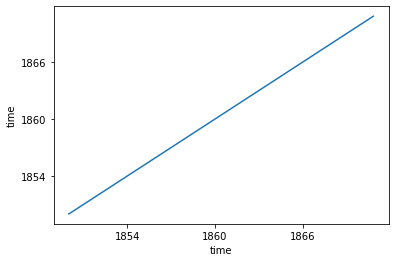

In [21]:
replace_time(ddict_combined['IPSL-CM6A-LR.gn.Omon.r6i1p1f1'], calendar='standard').time.plot()

In [22]:
ddict_combined = {k:ds.sel(time=slice('2000', '2100')) for k,ds in ddict_combined.items() if len(ds.time)>=250}

In [23]:
# ddict_combined = pick_first_member(ddict_combined)
ddict_combined = concat_members(ddict_combined, match_attr_ignore=['variant_label', 'experiment_id'])

In [24]:
for name, ds in ddict_combined.items():
    print(name)
    assert (ds.time.diff('time').astype(np.int64) > 0).all()
    assert 'lev_bounds' in list(ds.variables)

    print(f"{name} CHECK")

IPSL-CM6A-LR.gn.Omon
IPSL-CM6A-LR.gn.Omon CHECK
CanESM5.gn.Omon
CanESM5.gn.Omon CHECK
CanESM5-CanOE.gn.Omon
CanESM5-CanOE.gn.Omon CHECK
MPI-ESM1-2-LR.gn.Omon
MPI-ESM1-2-LR.gn.Omon CHECK
MPI-ESM1-2-HR.gn.Omon
MPI-ESM1-2-HR.gn.Omon CHECK
ACCESS-ESM1-5.gn.Omon
ACCESS-ESM1-5.gn.Omon CHECK
UKESM1-0-LL.gn.Omon
UKESM1-0-LL.gn.Omon CHECK
MIROC-ES2L.gn.Omon
MIROC-ES2L.gn.Omon CHECK
CNRM-ESM2-1.gn.Omon
CNRM-ESM2-1.gn.Omon CHECK
NorESM2-LM.gn.Omon
NorESM2-LM.gn.Omon CHECK
NorESM2-MM.gn.Omon
NorESM2-MM.gn.Omon CHECK
GFDL-ESM4.gn.Omon
GFDL-ESM4.gn.Omon CHECK
GFDL-CM4.gn.Omon
GFDL-CM4.gn.Omon CHECK
MRI-ESM2-0.gn.Omon
MRI-ESM2-0.gn.Omon CHECK


### How much does the boundary between IW and deep water change with forcing?

IPSL-CM6A-LR.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


CanESM5.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


CanESM5-CanOE.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


MPI-ESM1-2-LR.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


MPI-ESM1-2-HR.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


ACCESS-ESM1-5.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


UKESM1-0-LL.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


MIROC-ES2L.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


CNRM-ESM2-1.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


NorESM2-LM.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


NorESM2-MM.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


GFDL-ESM4.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


GFDL-CM4.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


MRI-ESM2-0.gn.Omon


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


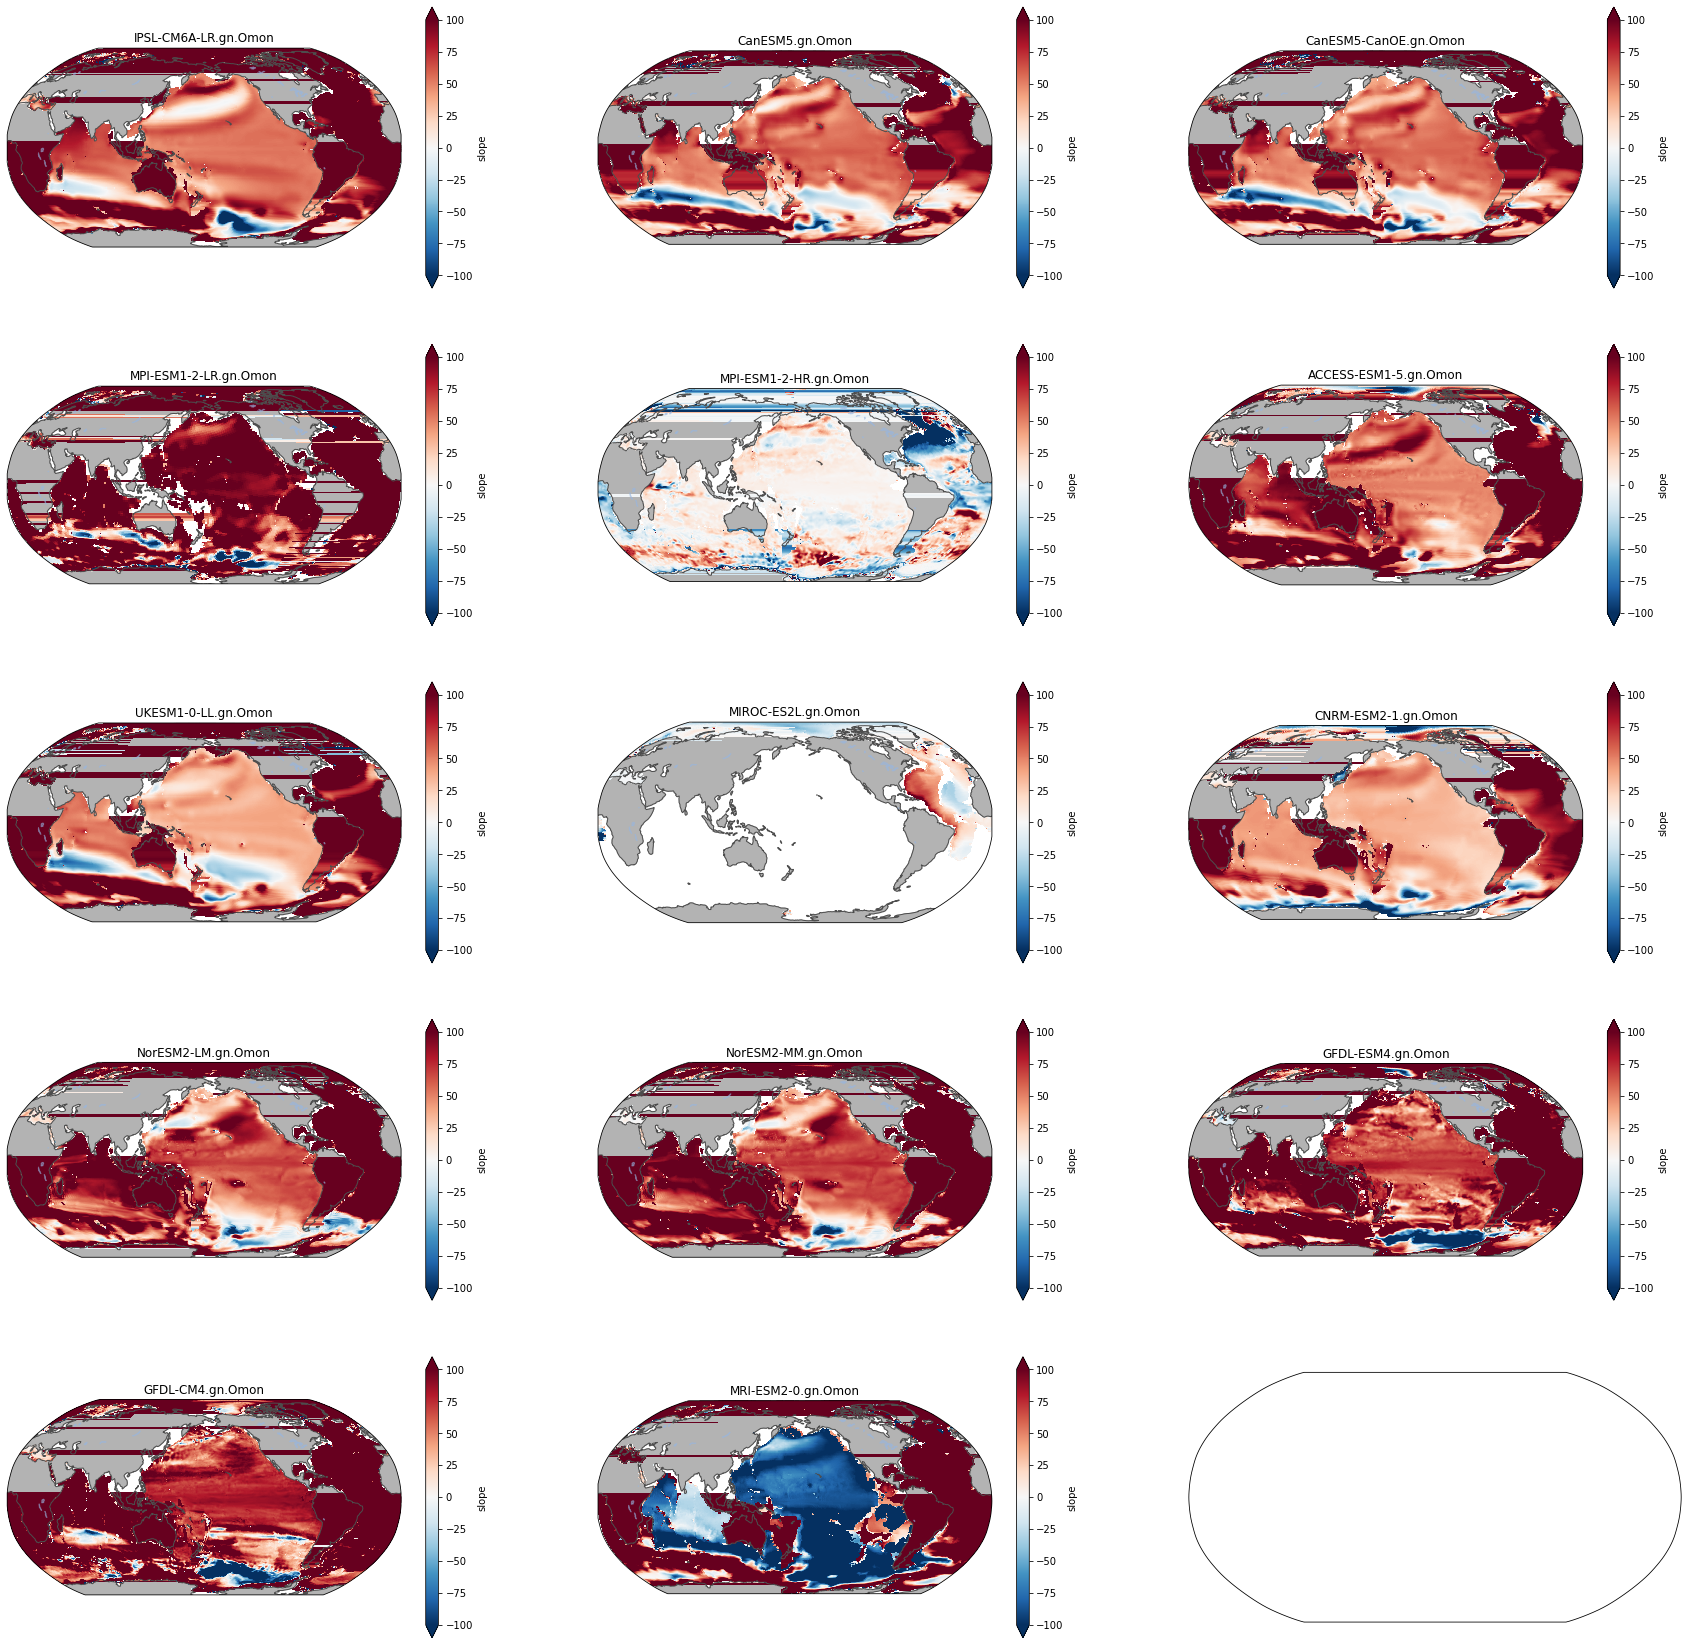

In [76]:
from xarrayutils.utils import linear_trend
from xarrayutils.plotting import map_util_plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, axarr = plt.subplots(ncols=3, nrows=5, figsize=[30,30], subplot_kw={'projection':ccrs.Robinson(180)})
for ax, (name, ds) in zip(axarr.flat, ddict_combined.items()):
    
    
    print(name)
    # look at the boundary between deep and IW
    bound = ds.lev_bounds.isel(sigma_0=2, bnds=1)
    
    trend = linear_trend(bound.isel(time=slice(-100, None)), 'time')
    
    (trend.slope*100).plot(ax=ax, vmax=100,transform=ccrs.PlateCarree(), x='lon', y='lat')
    ax.set_title(name)
    map_util_plot(ax)

In [ ]:
from xarrayutils.utils import linear_trend
from xarrayutils.plotting import map_util_plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, axarr = plt.subplots(ncols=3, nrows=5, figsize=[30,30], subplot_kw={'projection':ccrs.Robinson(180)})
for ax, (name, ds) in zip(axarr.flat, ddict_combined.items()):
    print(name)
    # look at the boundary between deep and IW
    bound = ds.lev_bounds.isel(sigma_0=1, bnds=1)
    
    trend = linear_trend(bound.isel(time=slice(-100, None)), 'time')
    
    (trend.slope*100).plot(ax=ax, vmax=250,transform=ccrs.PlateCarree(), x='lon', y='lat')
    ax.set_title(name)
    map_util_plot(ax)

# Oxycline data

Hmm this varies too much between models...

In [12]:
%matplotlib inline

In [13]:
ofolder = pathlib.Path('../../cmip6_omz/data/processed/omz_boundaries') # I should move some of this data into the paper repo

In [14]:
oc_combined = xr.open_zarr(ofolder.joinpath('omz_boundaries_annual_combined.zarr'))

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


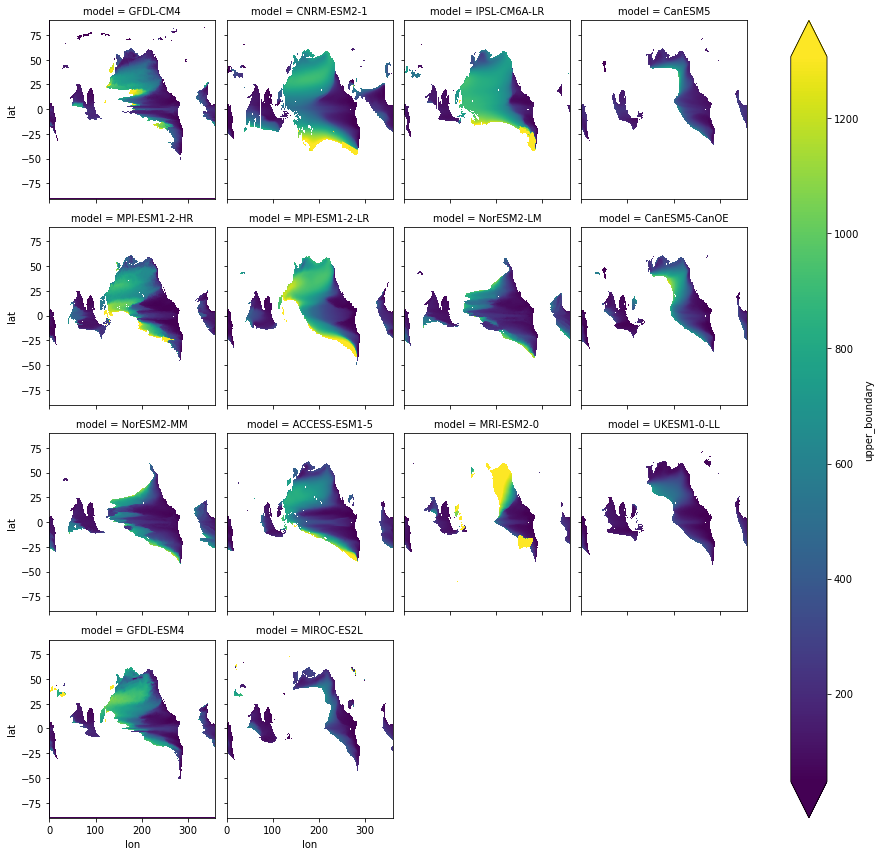

In [15]:
oc_combined.upper_boundary.min('time').plot(col='model', col_wrap=4, robust=True)

In [17]:
oc_trend = linear_trend(oc_combined.upper_boundary, 'time') * len(oc_combined.time)
#     oc_trend = oc_trend.where(oc_trend.p_value<=0.01)
with ProgressBar():
    oc_trend = oc_trend.load()

[###################################     ] | 87% Completed | 15.9s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[####################################### ] | 99% Completed | 19.6s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[####################################### ] | 99% Completed | 19.9s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed | 20.1s


In [18]:
# smooth the fields out a bit
from xarrayutils.filtering import filter_2D
oc_trend = filter_2D(oc_trend, 3, ['lat', 'lon'])

No `dtype` chosen. Input is Dataset.         Defaults to float64


In [19]:
# mask out the areas where the upper OMZ boundary is below 1000m
oc_trend = oc_trend.where(oc_combined.upper_boundary.min('time') < 1000)

In [20]:
oc_trend

<xarray.Dataset>
Dimensions:    (model: 14, lat: 360, lon: 720)
Coordinates:
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.0 88.5 89.0 89.5
  * lon        (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 358.0 358.5 359.0 359.5
  * model      (model) <U13 'GFDL-CM4' 'CNRM-ESM2-1' ... 'MIROC-ES2L'
Data variables:
    slope      (model, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    intercept  (model, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    r_value    (model, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    p_value    (model, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    std_err    (model, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>

In [23]:
def multi_median_plot(da, long_name, units, vmax, threshold=0.6):
    
    median_map = da.median('model').load()
    median_map = median_map.assign_coords(model='median')

    median_sign_agreement = sign_agreement(da, median_map, 'model', threshold=threshold)

    da_plot = xr.concat([da, median_map], dim='model')
    da.name = long_name
    da.attrs['long_name'] = long_name
    da.attrs['units'] = units


    kwargs = dict(
        x='lon',
        y='lat',
        transform=ccrs.PlateCarree(),
    )

    out = da_plot.plot(
        col='model',
        col_wrap=3,
        vmax=vmax,
        size=3,
        aspect=1.75,
        subplot_kws={'projection':ccrs.Robinson(210)},
        **kwargs
    )



    ax = out.axes.flat[-1]
    median_sign_agreement.plot.contourf(
        ax=ax,
        levels=[0,0.5],
        hatches=[None, '....'],
        colors='none',
        add_colorbar=False,
        add_labels=False,
        **kwargs
    )
    ax.set_title('Median of all models')

    for ax in out.axes.flat:
        map_util_plot(ax)

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: Al

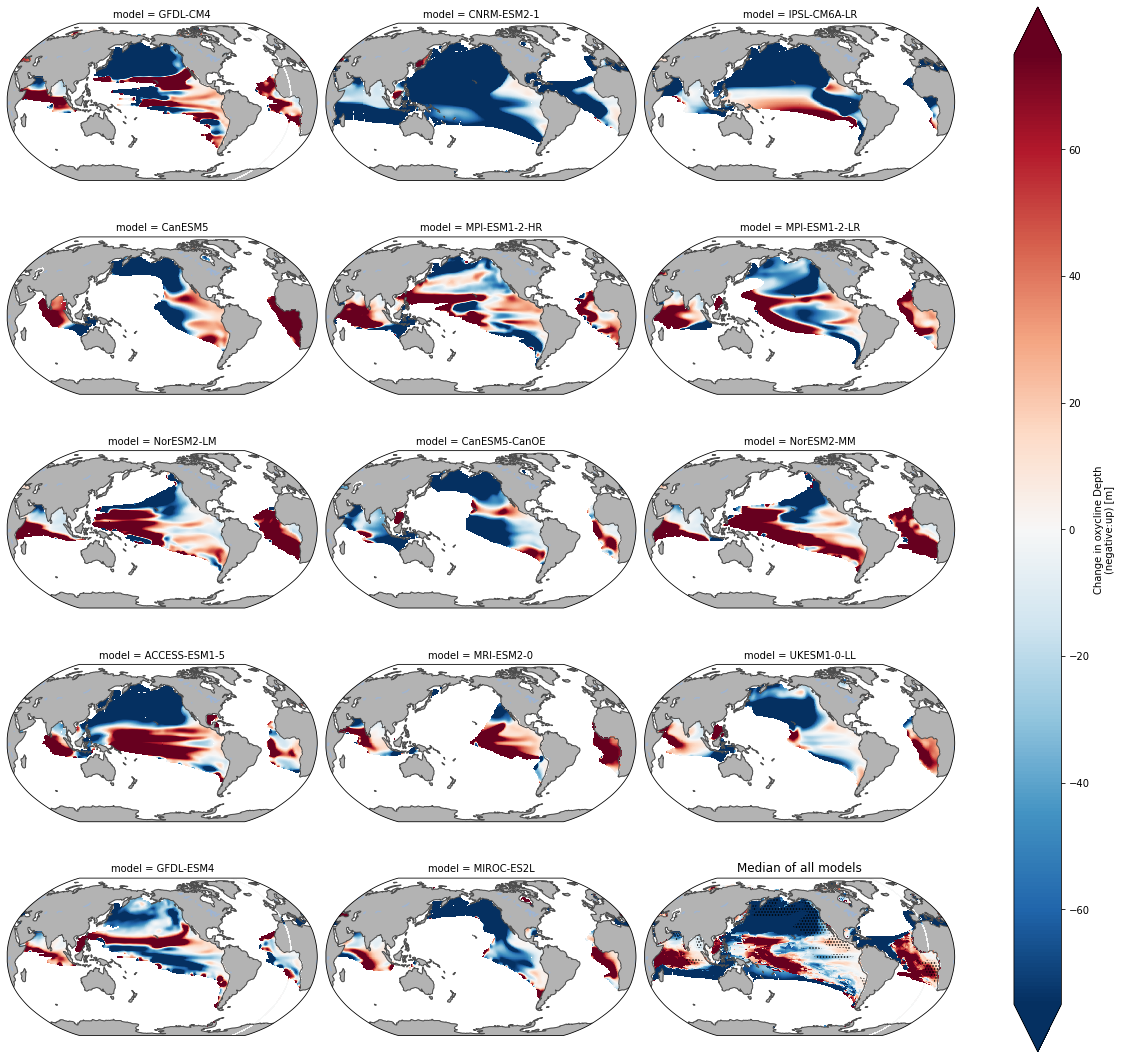

In [26]:
multi_median_plot(oc_trend.slope, 'Change in oxycline Depth (negative:up)', 'm', 75, threshold=0.75)

# Compare the lower bound deepening to the change in thickness

In [97]:
lower_bound = ds.lev_bounds.isel(sigma_0=1, bnds=1)
trend_wrapper(lower_bound)

<xarray.DataArray 'slope' (y: 256, x: 360)>
dask.array<mul, shape=(256, 360), dtype=float64, chunksize=(256, 360), chunktype=numpy.ndarray>
Coordinates:
    dy_t            (y, x) float64 dask.array<chunksize=(256, 360), meta=np.ndarray>
    dx_t            (y, x) float64 dask.array<chunksize=(256, 360), meta=np.ndarray>
    areacello       (y, x) float32 dask.array<chunksize=(256, 360), meta=np.ndarray>
    bnds            int64 1
    lat             (y, x) float32 dask.array<chunksize=(256, 360), meta=np.ndarray>
    lat_bounds      (y, x) float64 dask.array<chunksize=(256, 360), meta=np.ndarray>
    lon             (y, x) float32 dask.array<chunksize=(256, 360), meta=np.ndarray>
    lon_bounds      (x, y) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    sigma_0         float64 25.5
    sigma_0_bounds  float64 dask.array<chunksize=(), meta=np.ndarray>
  * x               (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * y               (y) float64 -88.0 -85.75 -85.25 -84.75 ... 148.6 150.5 152.4

In [99]:
datasets_ratio = []
for name, ds in ddict_combined.items():
    print(name)
    with ProgressBar():
        #simplest way. average the members first. Check correctness if this later
        if 'member_id' in ds.dims:
            # is this the right way to do it?
            ds = ds.reset_coords(['lev_bounds'])
            ds = ds.mean('member_id', keep_attrs=True)
        
        # this is currently for the upper layer (thermocline), but can be modified if needed
        omz_thickness = ds.omz_thickness.isel(sigma_0=[0, 1]).sel(o2_bin=80).sum('sigma_0')
        lower_bound = ds.lev_bounds.isel(sigma_0=1, bnds=1)
        
        nanmask = (omz_thickness==0).all('time')
        thickness_trend = trend_wrapper(omz_thickness)
        lower_bound_trend = trend_wrapper(lower_bound)
        
        result = (thickness_trend-lower_bound_trend).where(~nanmask).load()
        result_regridded = regrid_regular(result.to_dataset(name='dummy')).dummy
        result_regridded = result_regridded.assign_coords(model=ds.attrs['source_id'])
        datasets_ratio.append(result_regridded)

result_combined = xr.concat(datasets_ratio, dim='model')
result_combined

IPSL-CM6A-LR.gn.Omon
[#######################                 ] | 58% Completed |  6.4s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  9.5s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CanESM5.gn.Omon
[################################        ] | 81% Completed | 12.7s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 15.7s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CanESM5-CanOE.gn.Omon
[#################                       ] | 43% Completed |  3.5s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  6.0s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


MPI-ESM1-2-LR.gn.Omon
[###############################         ] | 78% Completed |  1.8s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  2.1s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


MPI-ESM1-2-HR.gn.Omon
[#####################################   ] | 94% Completed |  1.3s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  1.4s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


ACCESS-ESM1-5.gn.Omon
[################                        ] | 42% Completed |  2.8s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  5.8s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


UKESM1-0-LL.gn.Omon
[######################                  ] | 56% Completed |  5.0s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  9.1s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


MIROC-ES2L.gn.Omon
[######################################  ] | 96% Completed |  1.2s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed |  1.3s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CNRM-ESM2-1.gn.Omon
[################                        ] | 40% Completed |  3.0s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  6.2s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


NorESM2-LM.gn.Omon
[#####################################   ] | 94% Completed |  1.3s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed |  1.4s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


NorESM2-MM.gn.Omon
[#####################################   ] | 94% Completed |  1.2s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed |  1.3s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


GFDL-ESM4.gn.Omon
[####################################    ] | 91% Completed |  2.3s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  2.5s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


GFDL-CM4.gn.Omon
[###################################     ] | 89% Completed | 11.2s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 13.1s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


MRI-ESM2-0.gn.Omon
[####################################    ] | 90% Completed |  2.1s

/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed |  2.2s


/scratch/gpfs2/jbusecke/conda_tigressdata/envs/busecke_etal_2021_aguadv_new/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


In [100]:
result_combined = xr.concat(datasets_ratio, dim='model').squeeze().drop('bnds')
result_combined

<xarray.DataArray 'dummy' (model: 14, y: 360, x: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
    o2_bin          int64 80
    bnds            (model) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 2.0 2.0 1.0
    sigma_0         float64 25.5
    sigma_0_bounds  float64 26.5
    lon             (y, x) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
    lat             (y, x) float64 -89.75 -89.75 -89.75 ... 89.75 89.75 89.75
  * model           (model) <U13 'IPSL-CM6A-LR' 'CanESM5' ... 'MRI-ESM2-0'
Dimensions without coordinates: y, x

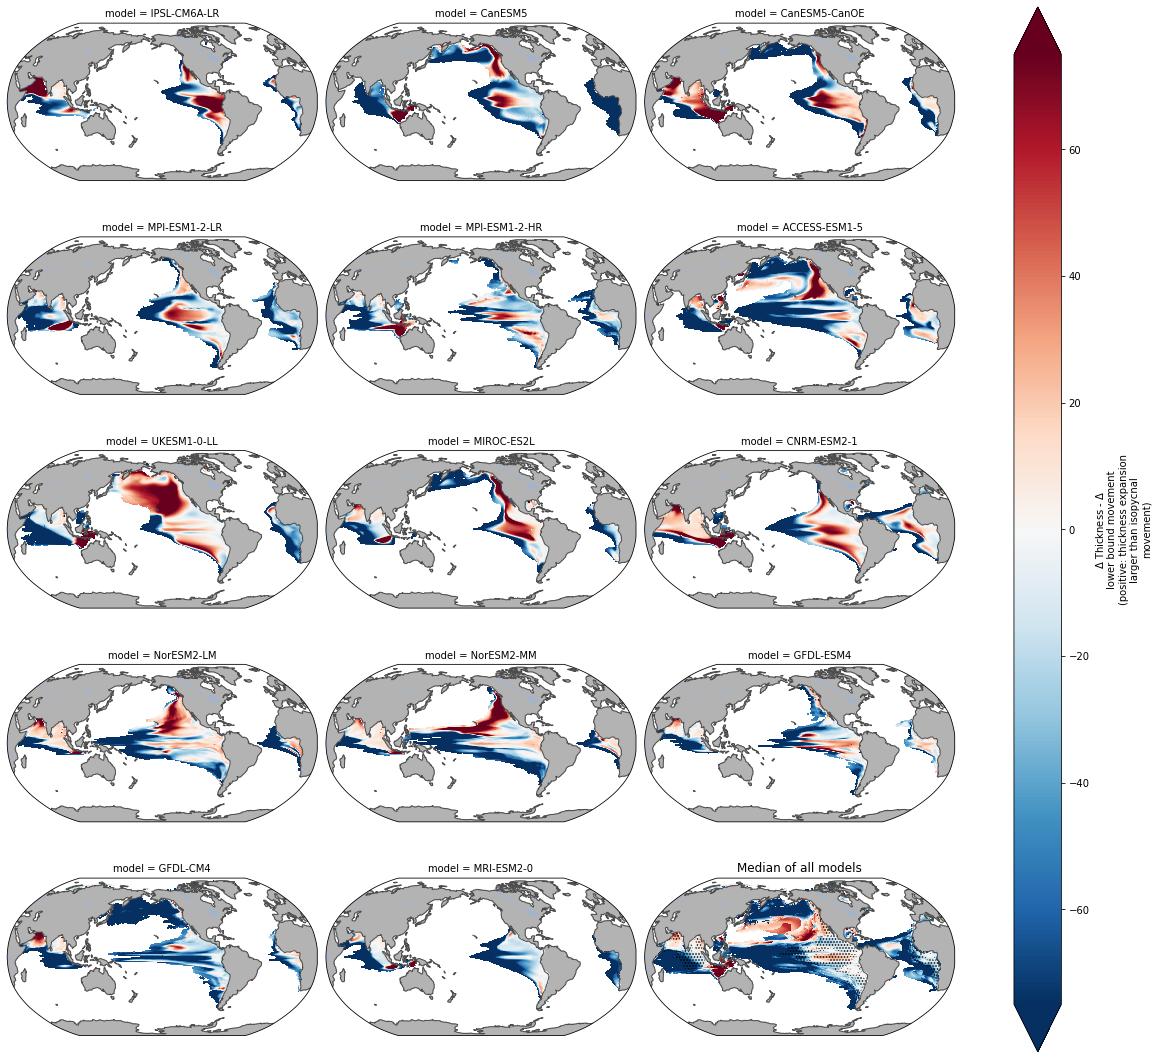

In [109]:
multi_median_plot(
    result_combined,
    '$\Delta$ Thickness - $\Delta$ lower bound movement (positive: thickness expansion larger than isopycnal movement)',
    'm',
    75,
    threshold=0.6
)